 # Participation Distribution in Committee Selection

 ### Executive Summary

 In the following computer experiments, we aim to understand the
 distribution of selections in a committee when varying sizes of the
 participant pool of SPOs and the committee. We show that the
 "pigeonhole principle" helps us interpret the results and understand
 the finite distribution of the committee seats assigned to participants
 as a function of stake, group, and committee sizes.

 The experiment is designed to:
 - Sample without replacement a group of participants from the population
   and
 - Calculate the stake weight for each participant, which is the stake
   normalized over the group to sum to 1.
 - Assign a committee of the fixed group size based on the stake weight
   of each using random selection with replacement.
 - Analyze the relationship and distribution of committee selection with
   group size.

 We conducted the experiments with varying sizes (100, 200, ..., 500) of
 groups and committees. The results are visualized through plots of
 committee assignments where we vary the group size to see how the
 committee selection and seat count changes.

 The results show that some group members with smaller stake weights may
 not (ever?) get selected for committee seats. With repeated trials where
 a new committee is selected, called an *epoch*, and assuming nonzero
 stake weight, there is nonzero probability of selecting *any* participant
 in the long run. However, in the short term, there is a significant chance
 that some participants will not ever get selected, almost surely. This is
 a natural outcome of the selection process with a discrete and finite
 number of seats. This is a manifestation of this committee selection
 process as it currently stands.


In [ ]:
# %%

# Load the required libraries

from participation_lib import (
    np,
    pd,
    plt,
    sns,
    load_data,
    get_stake_distribution,
    assign_commitee_plus,
    simulate,
    std_error,
    plot_group_to_committee_index,
    plot_selection_count_vs_stake,
    plot_committee_selection_counts,
    plot_committee_selection_seat_cutoff,
)

In [ ]:
# %%

# Load the Data: The population of registered SPOs

population = load_data("../data/pooltool-cleaned.csv")

print(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3056 non-null   object 
 1   stake          3056 non-null   int64  
 2   stake_percent  3056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.8+ KB
None


In [ ]:
# %%

population.describe()

,stake,stake_percent
count,3.056000e+03,3056.000000
mean,7.305314e+06,0.032723
std,1.648449e+07,0.073839
min,0.000000e+00,0.000000
25%,5.265000e+02,0.000002
50%,5.692500e+04,0.000255
75%,3.282500e+06,0.014703
max,1.054300e+08,0.472250


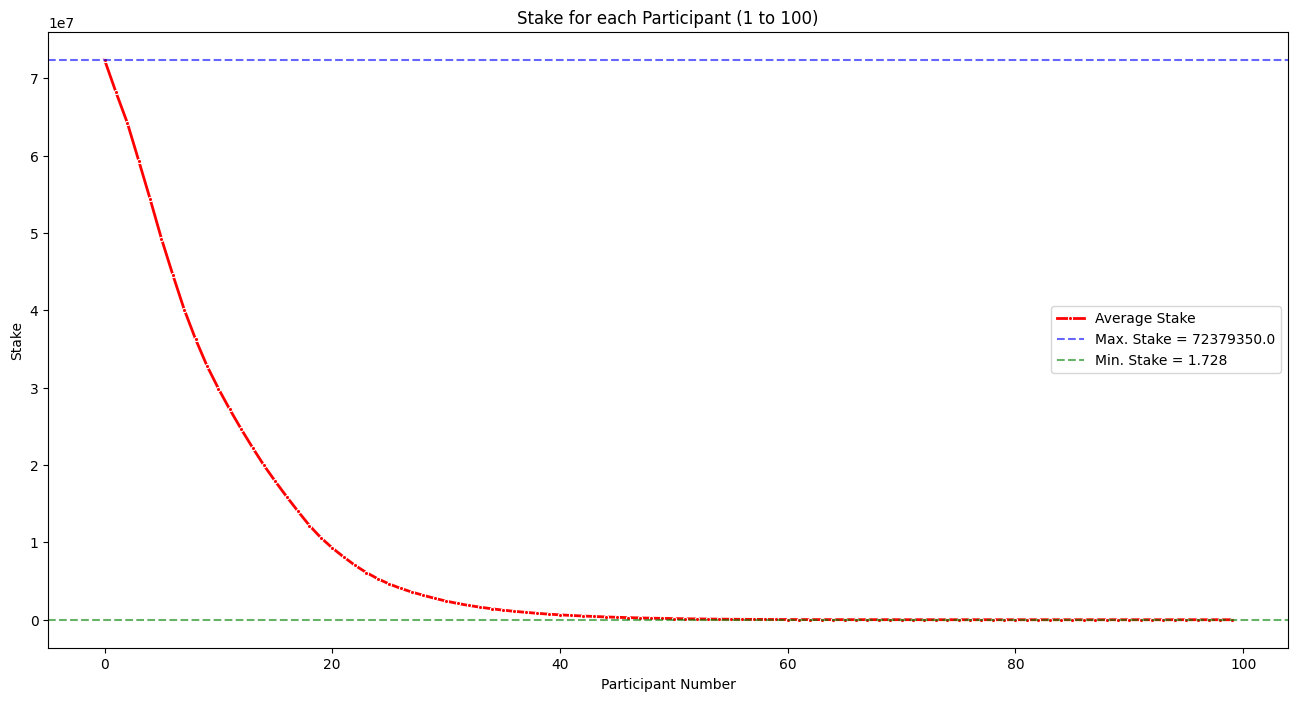

           stake  stake_weight
0   7.237935e+07  9.176386e-02
1   6.820048e+07  8.646581e-02
2   6.423218e+07  8.143473e-02
3   5.934951e+07  7.524439e-02
4   5.439758e+07  6.896624e-02
..           ...           ...
95  2.024800e+01  2.567078e-08
96  1.163000e+01  1.474473e-08
97  6.390000e+00  8.101358e-09
98  3.352000e+00  4.249727e-09
99  1.728000e+00  2.190790e-09

[100 rows x 2 columns]


In [ ]:
# %%

# Let's now sample a group of participants from the population
# and calculate the stake weight for each participant.

group_size = 100

group_stakes = get_stake_distribution(
    population,
    group_size=group_size,
    num_iter=1000,
    plot_it=True,
)
print(group_stakes)

In [ ]:
# %%

print(group_stakes.describe())

              stake  stake_weight
count  1.000000e+02  1.000000e+02
mean   7.887566e+06  1.000000e-02
std    1.657780e+07  2.101763e-02
min    1.728000e+00  2.190790e-09
25%    1.943554e+03  2.464073e-06
50%    1.605020e+05  2.034873e-04
75%    4.789338e+06  6.072009e-03
max    7.237935e+07  9.176386e-02


In [ ]:
# %%

# Let's now assign a committee of the fixed group_size
# based on the stake weight of each

results = assign_commitee_plus(
    group_stakes,
    committee_size=group_size,
    num_iter=1000,
)

In [ ]:
# %%

# Let's now create a plots of committee assignments where we vary
# the group size over {100, 200, 300, 400, 500} and see how the
# committee selection and seat count changes.

# Initialize Parameters:
# comm_sizes = [100]  # vary over committee size, k
# group_sizes = [100]  # vary over group size, n
comm_sizes = [100, 200, 300, 400, 500]  # vary over committee size, k
group_sizes = [100, 200, 300, 400, 500]  # vary over group size, n
num_iter = 1000  # Number of iterations for Monte Carlo simulation

# Note that the number of iterations here can be interpreted as the number
# of selection rounds for the committee, which we call an epoch.
# If we have a new epoch per day, then 1000 iterations is about 3 years.


Committee Size = 100
Group Size = 100


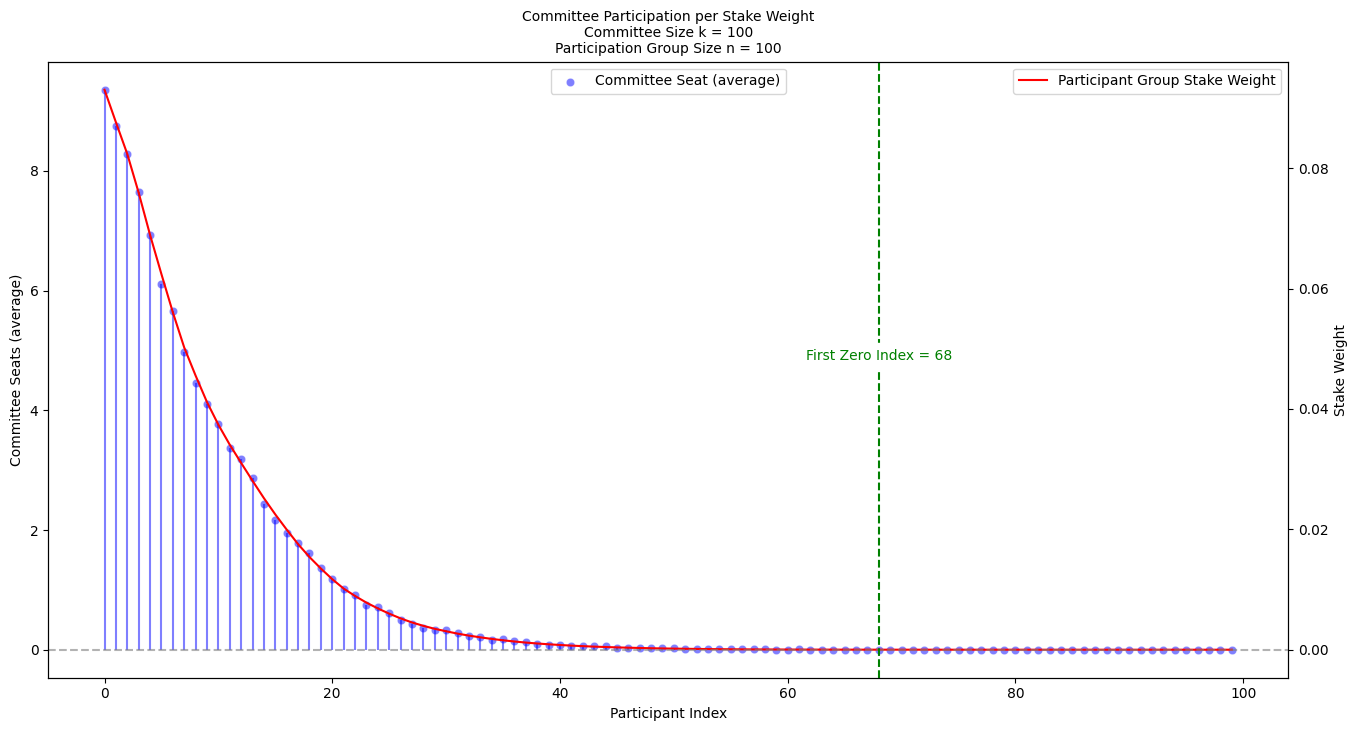

Group Size = 200


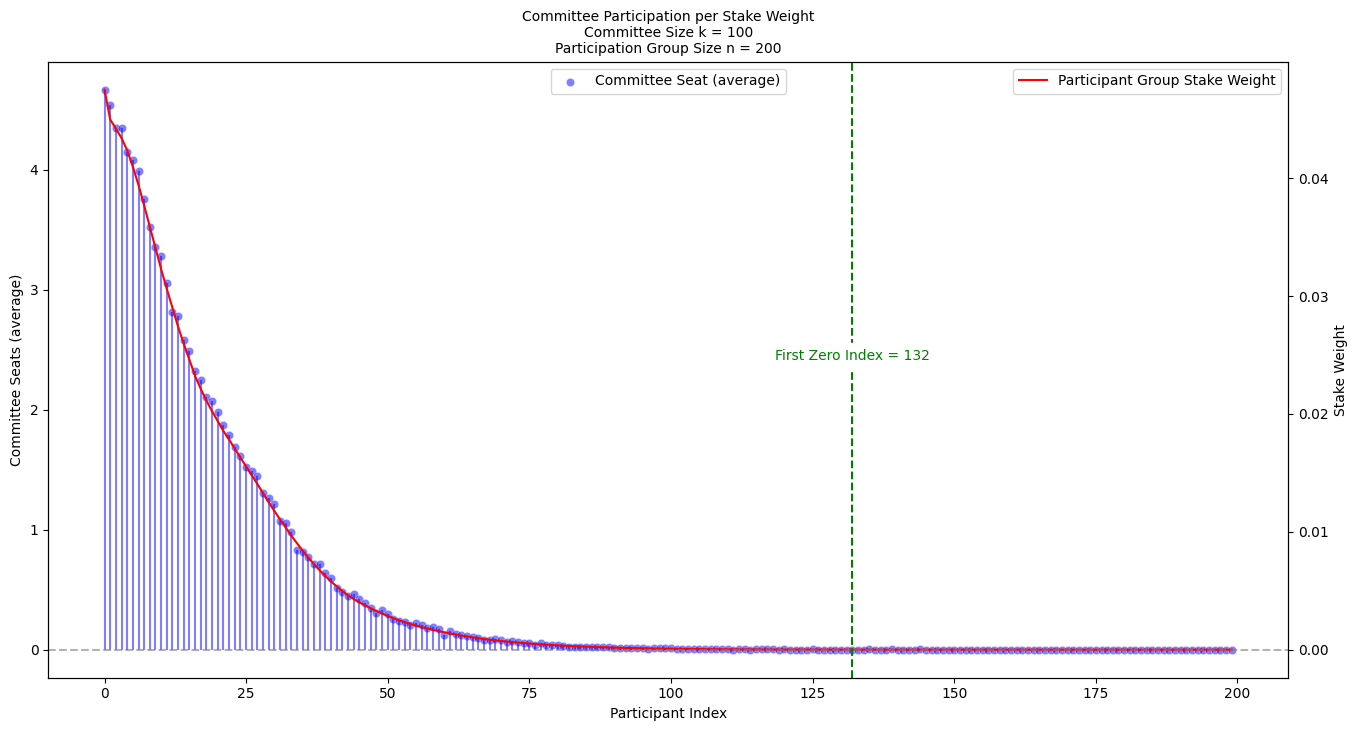

Group Size = 300


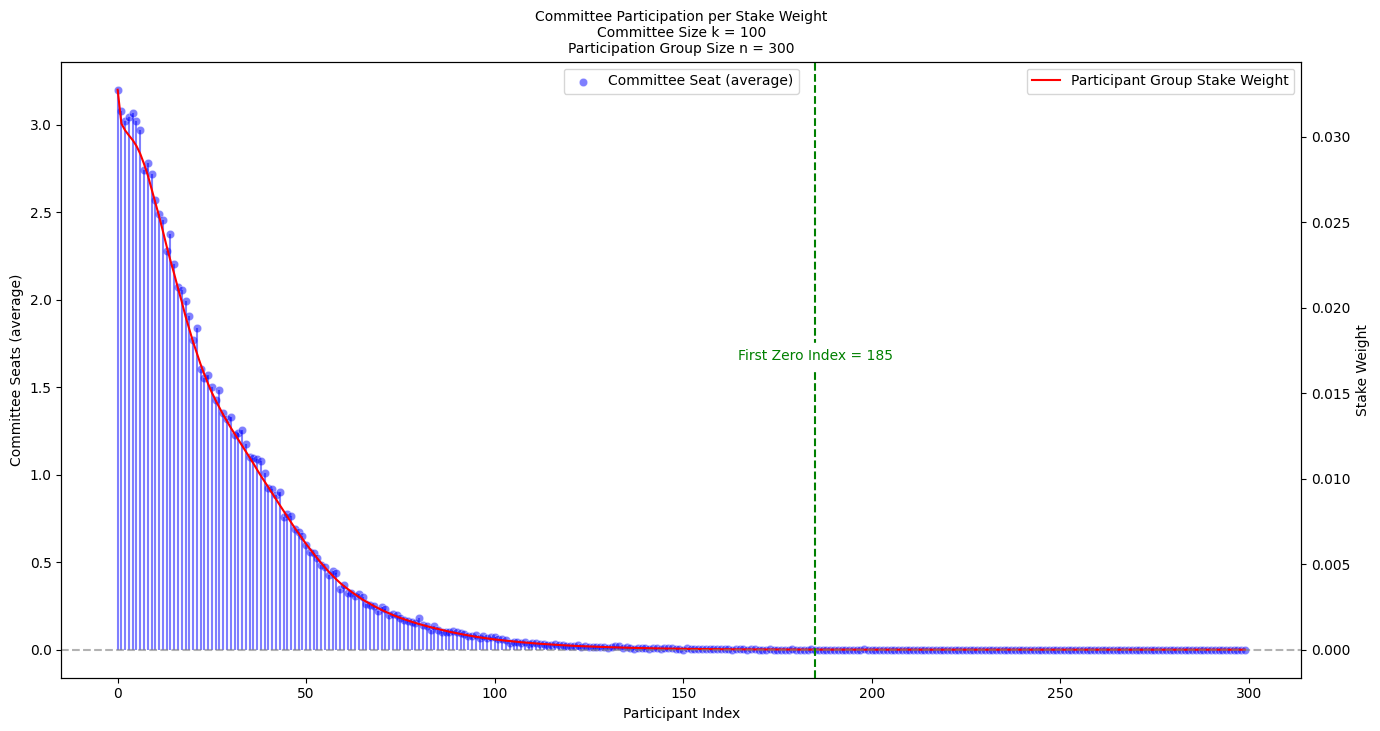

Group Size = 400


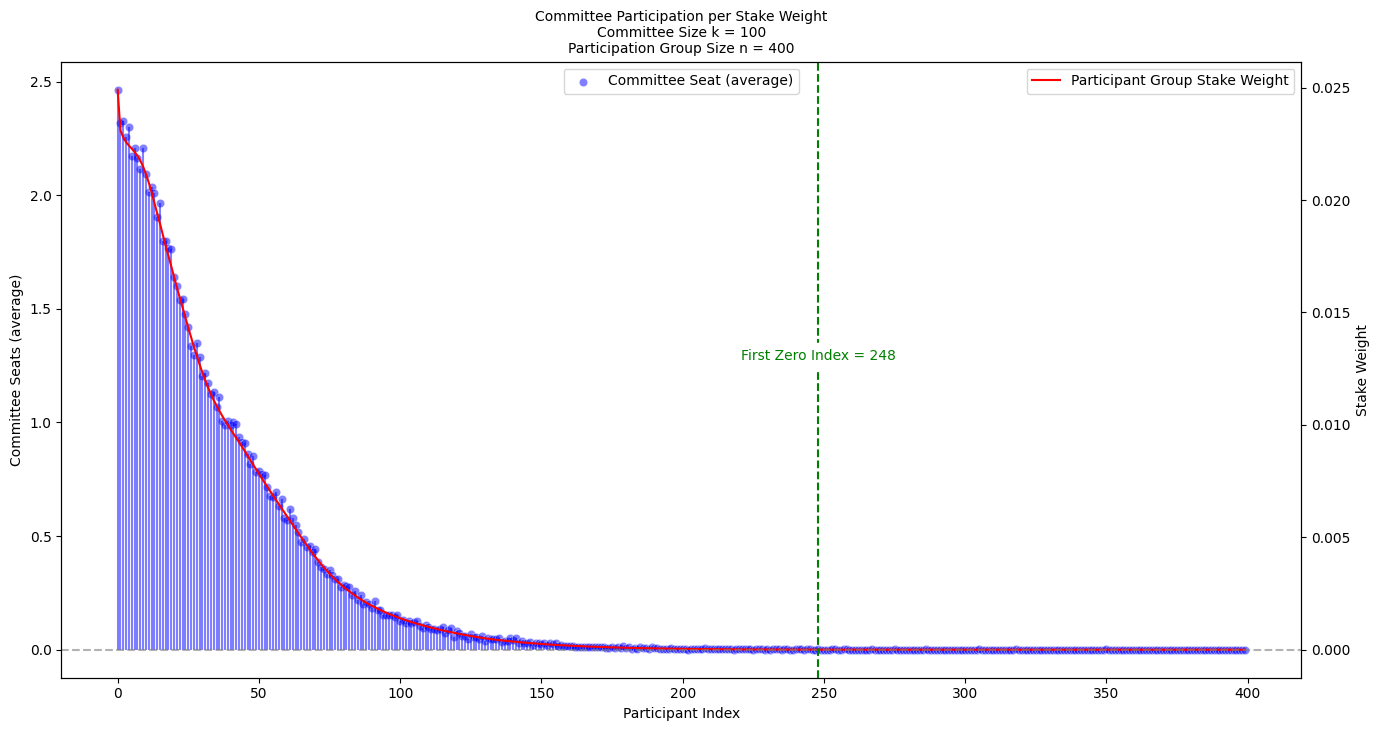

Group Size = 500


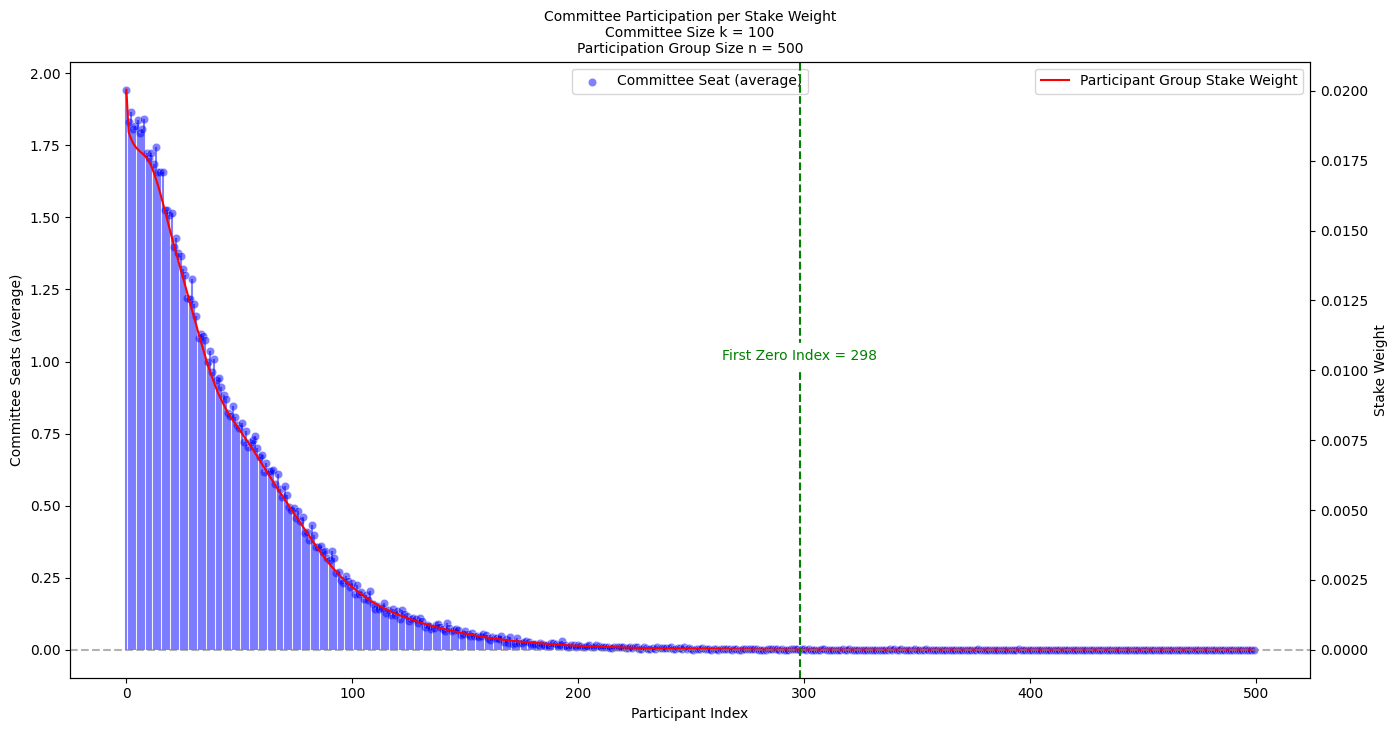


Committee Size = 200
Group Size = 100


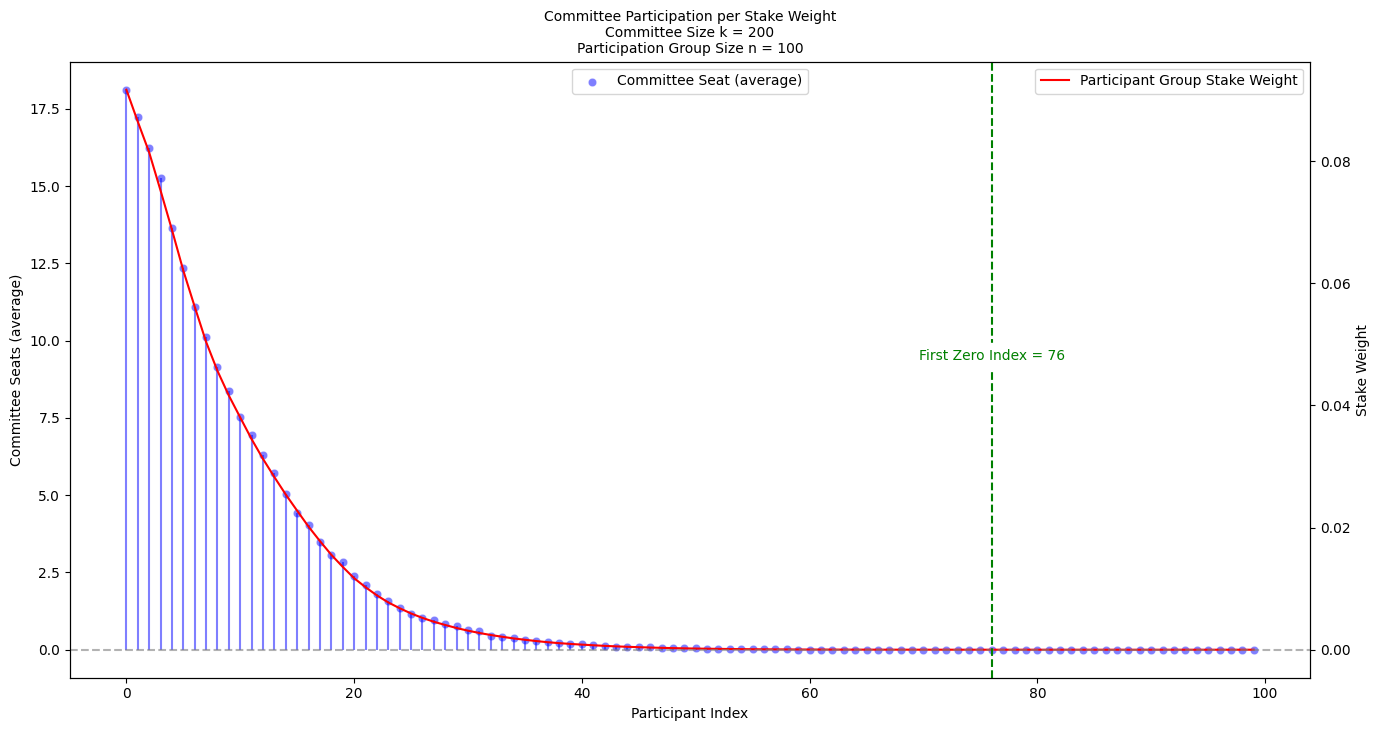

Group Size = 200


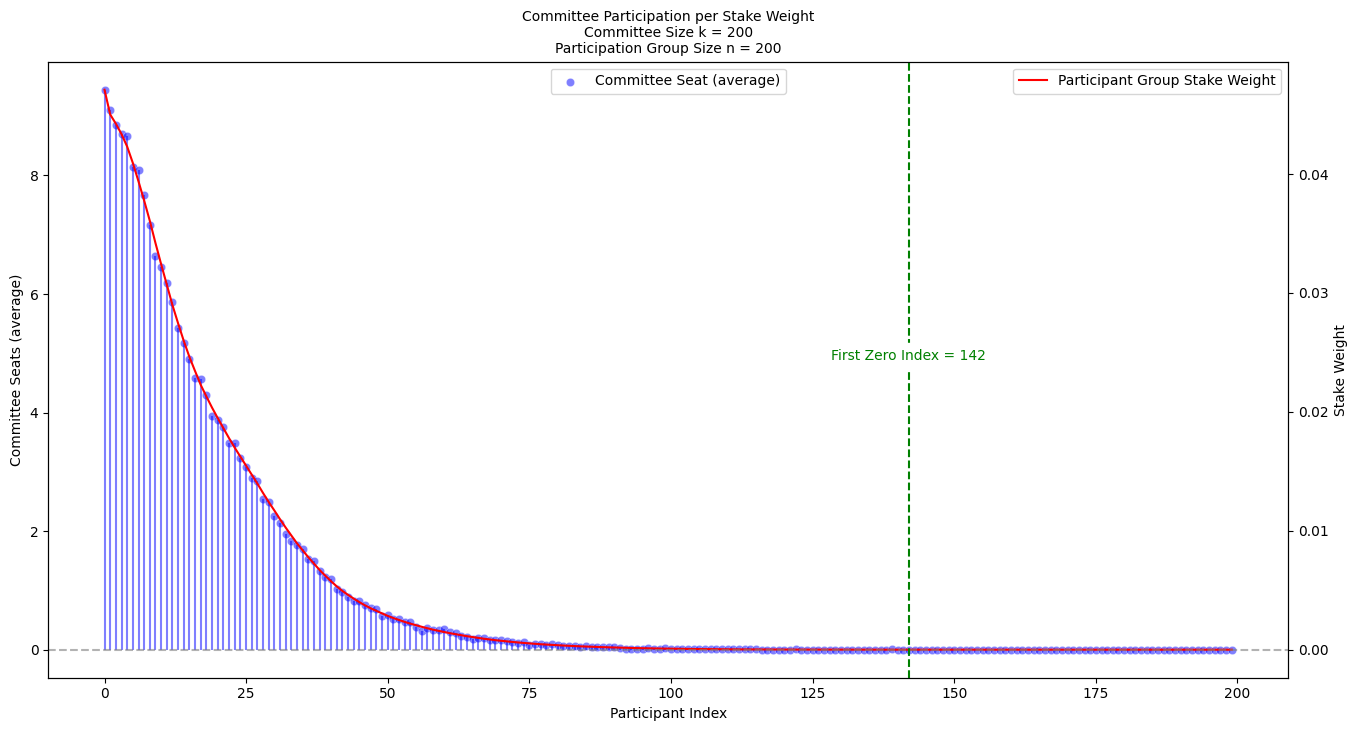

Group Size = 300


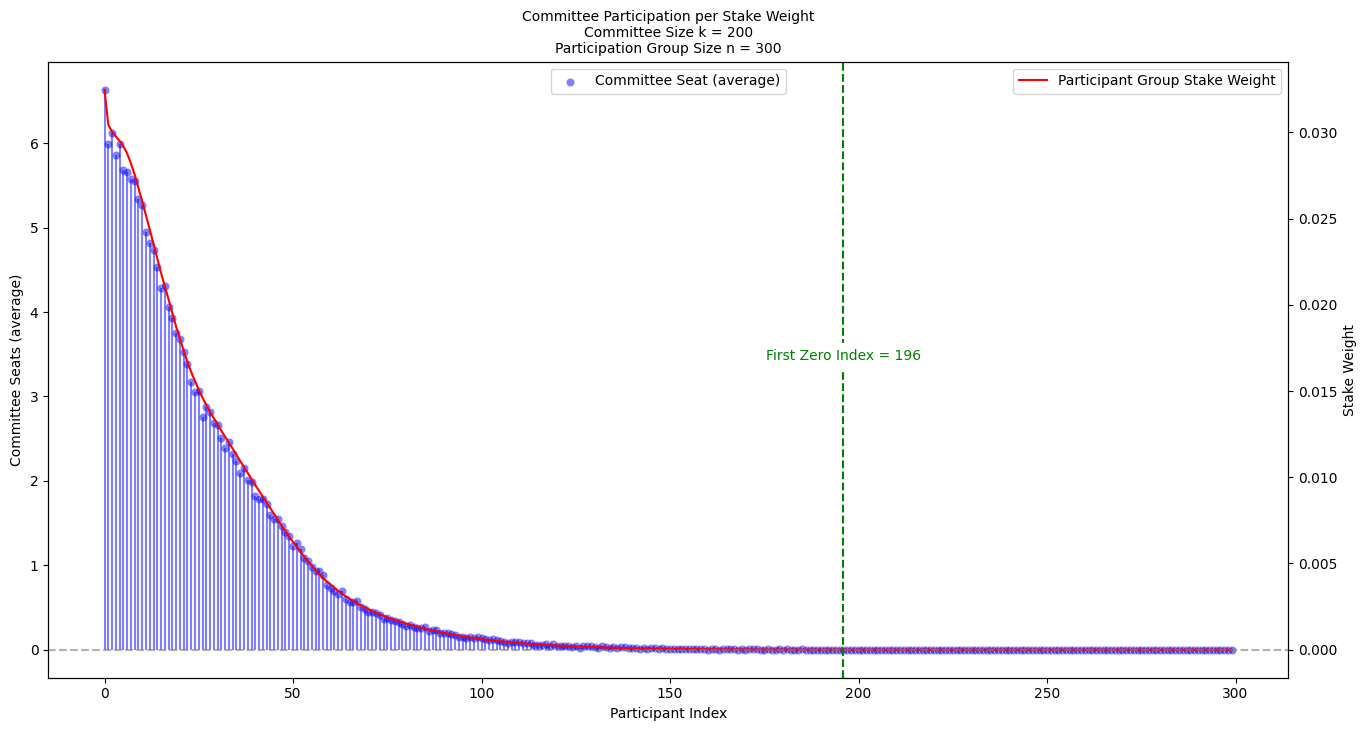

Group Size = 400


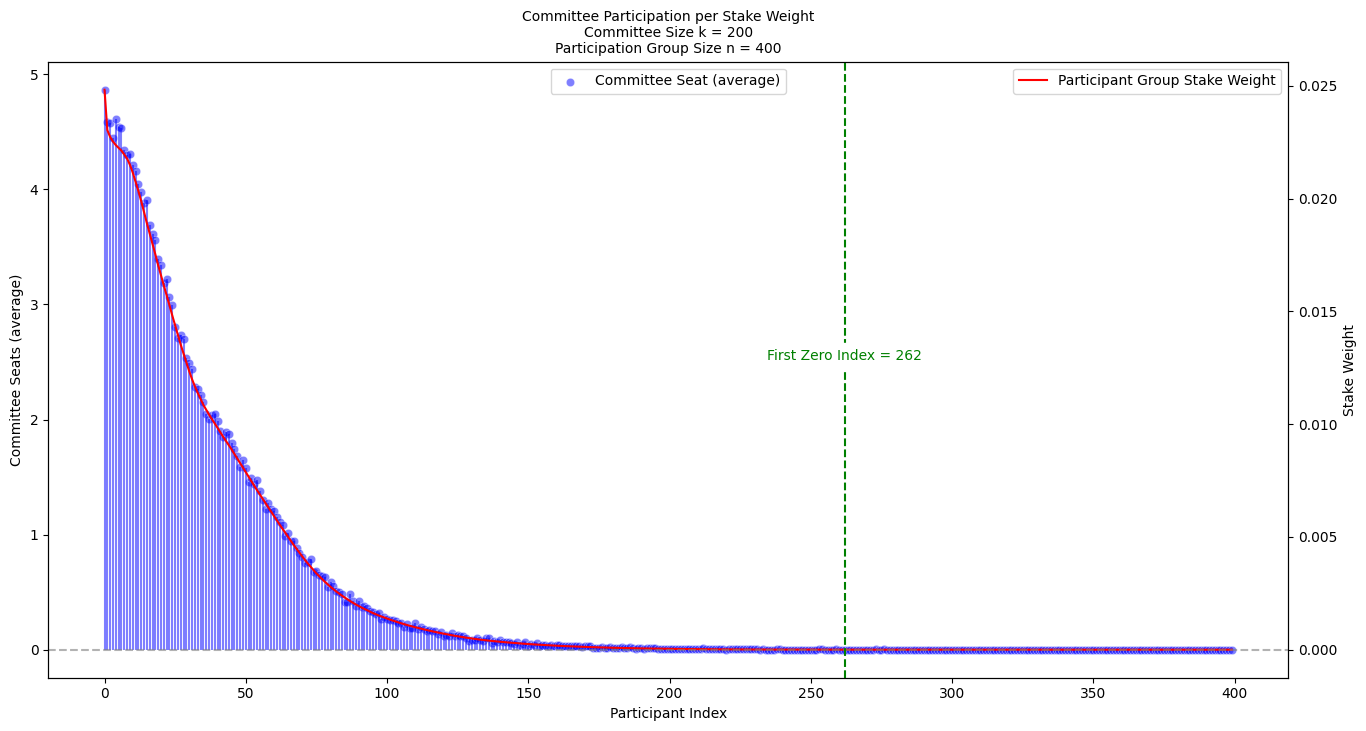

Group Size = 500


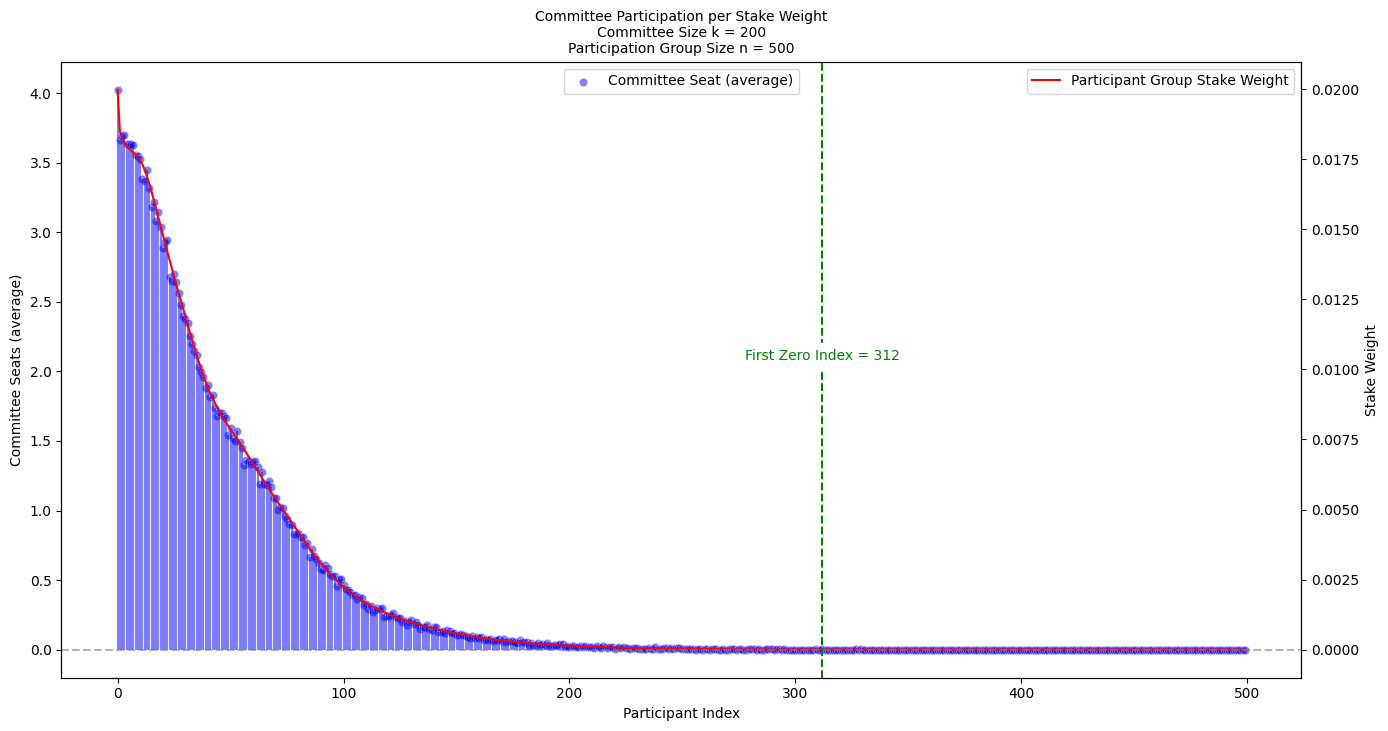


Committee Size = 300
Group Size = 100


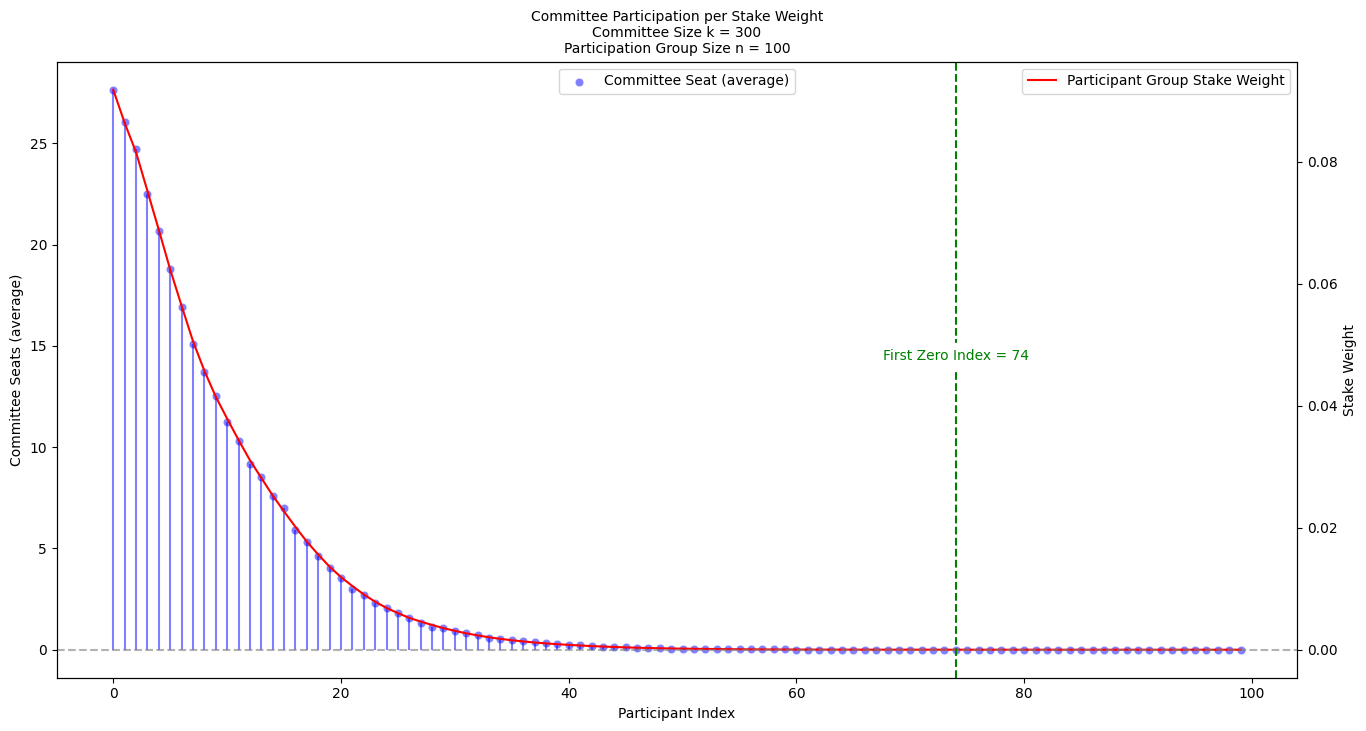

Group Size = 200


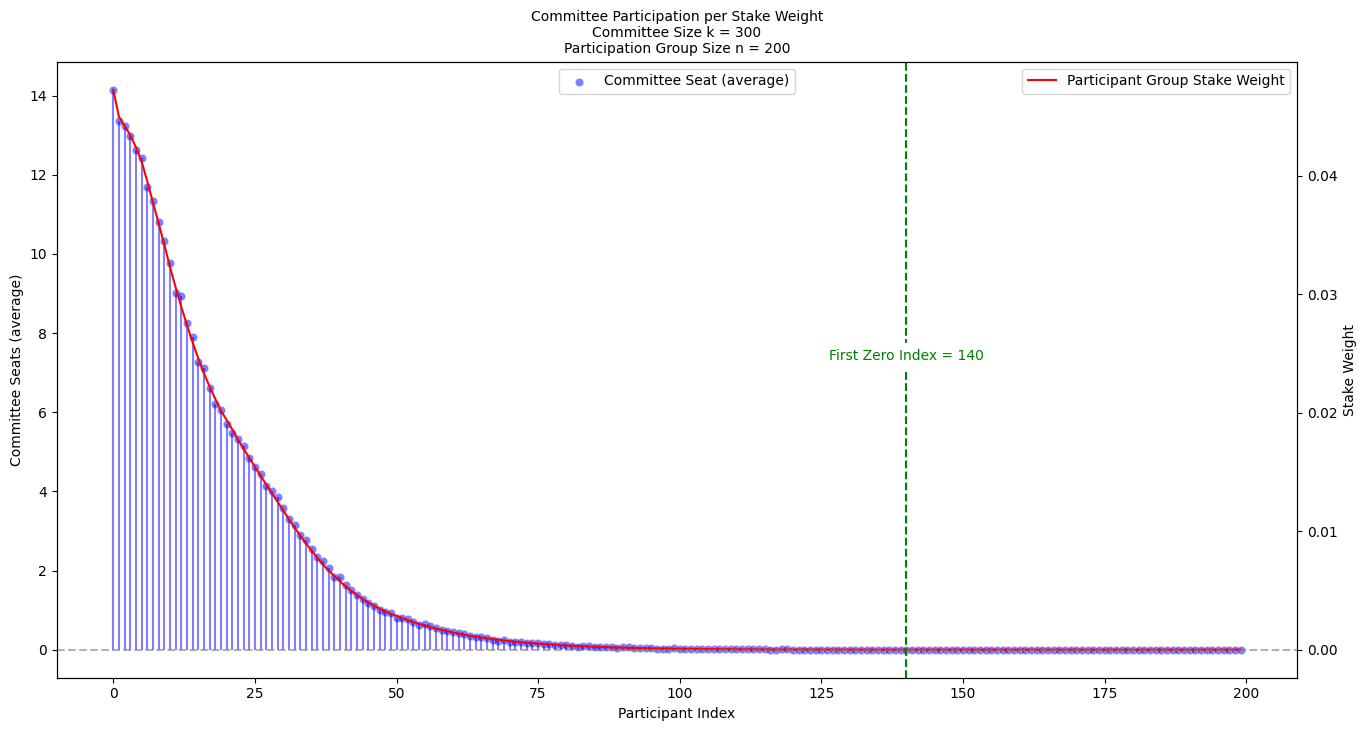

Group Size = 300


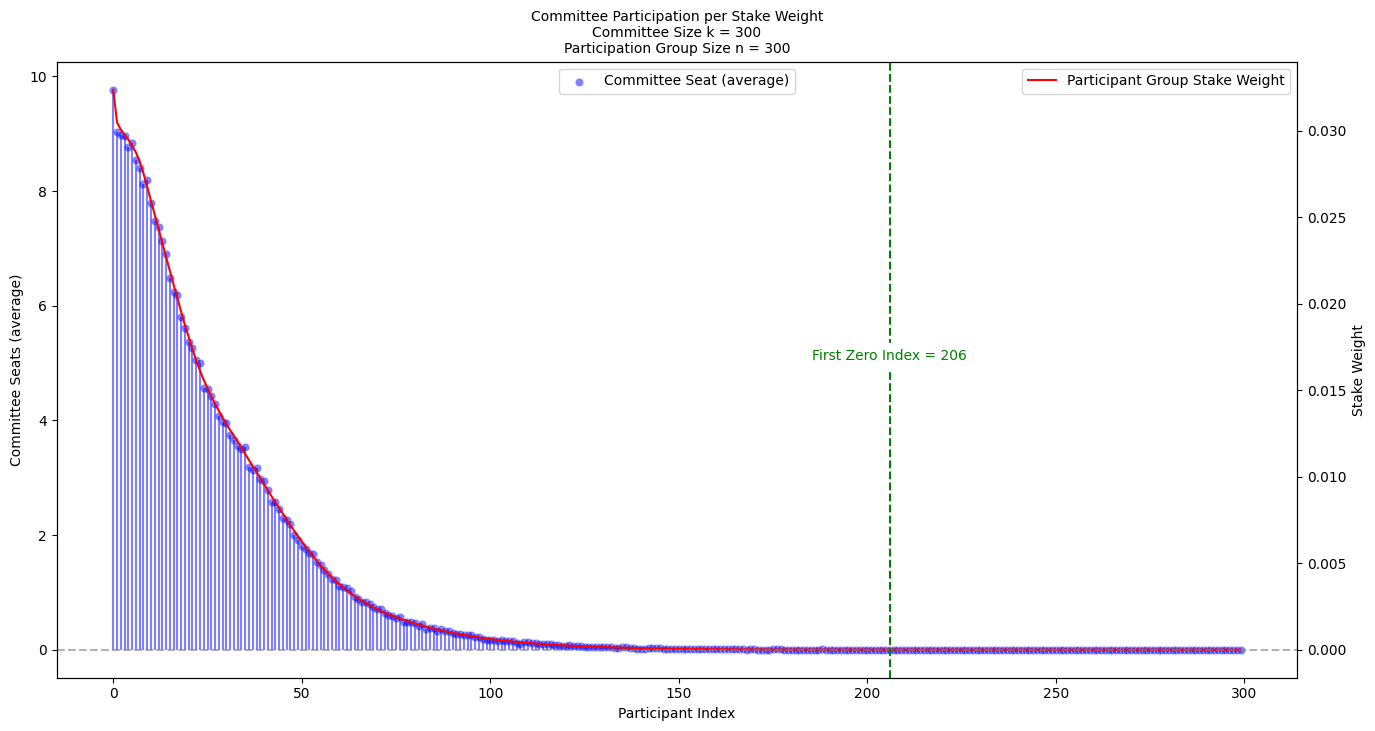

Group Size = 400


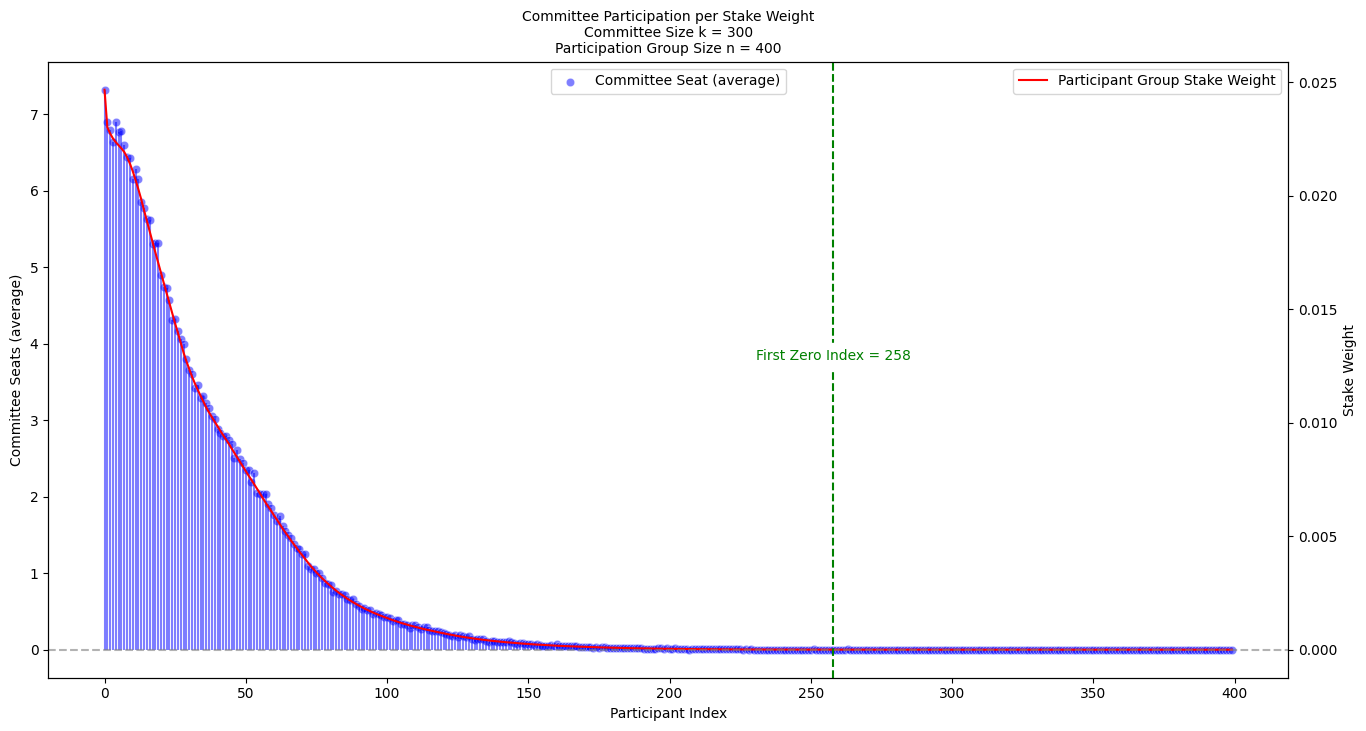

Group Size = 500


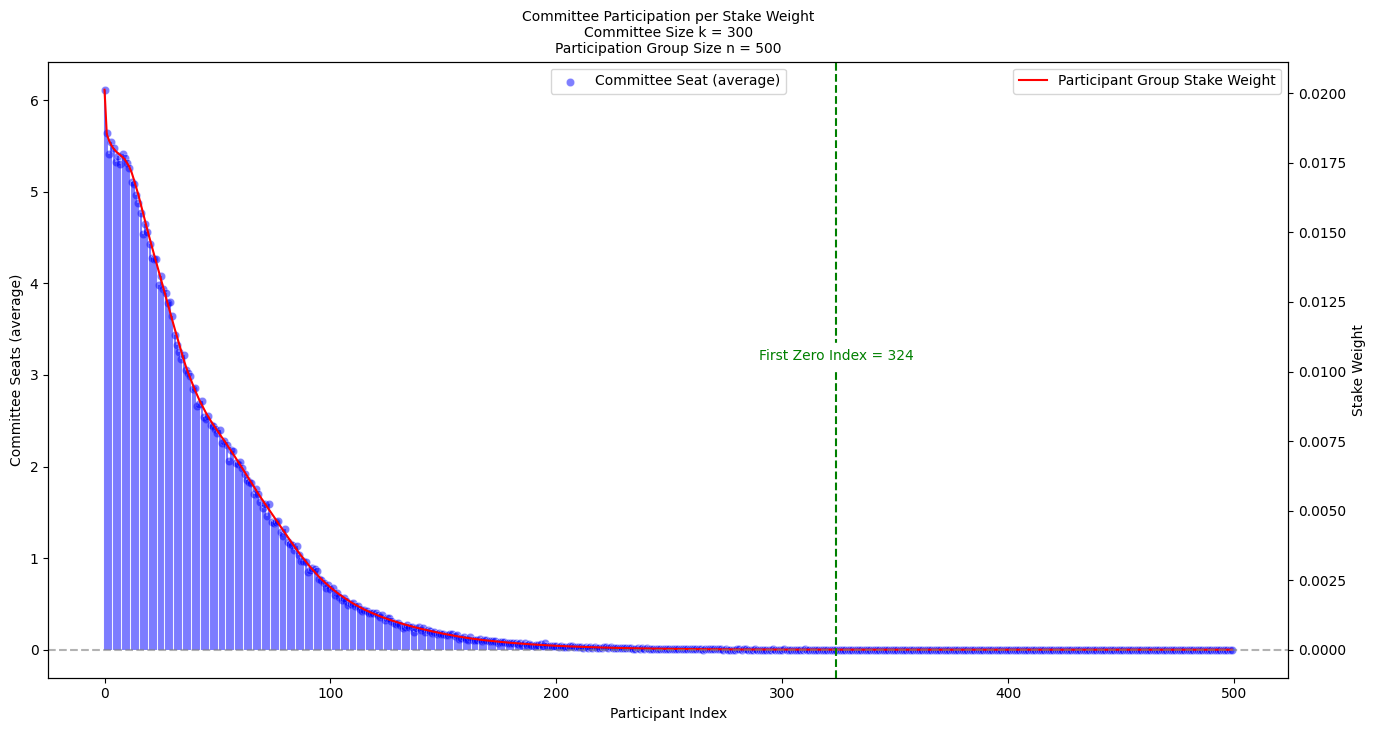


Committee Size = 400
Group Size = 100


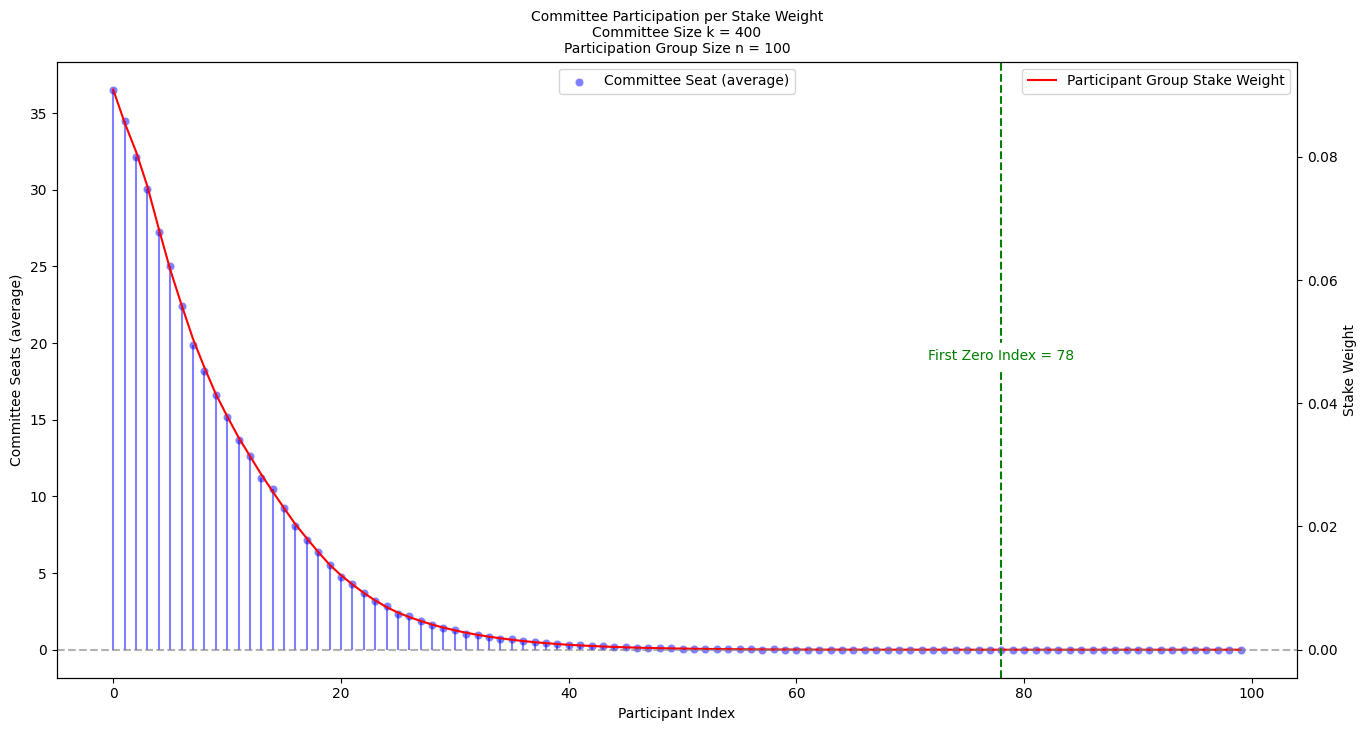

Group Size = 200


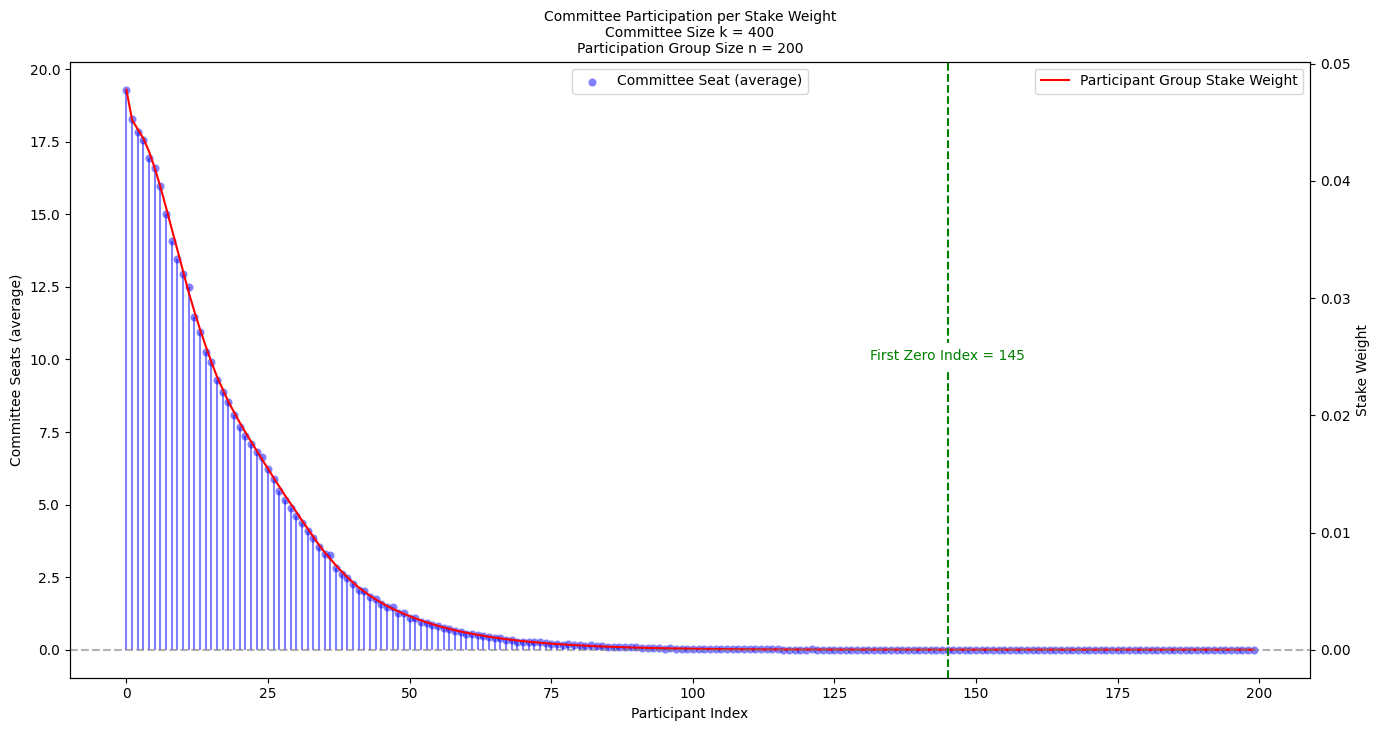

Group Size = 300


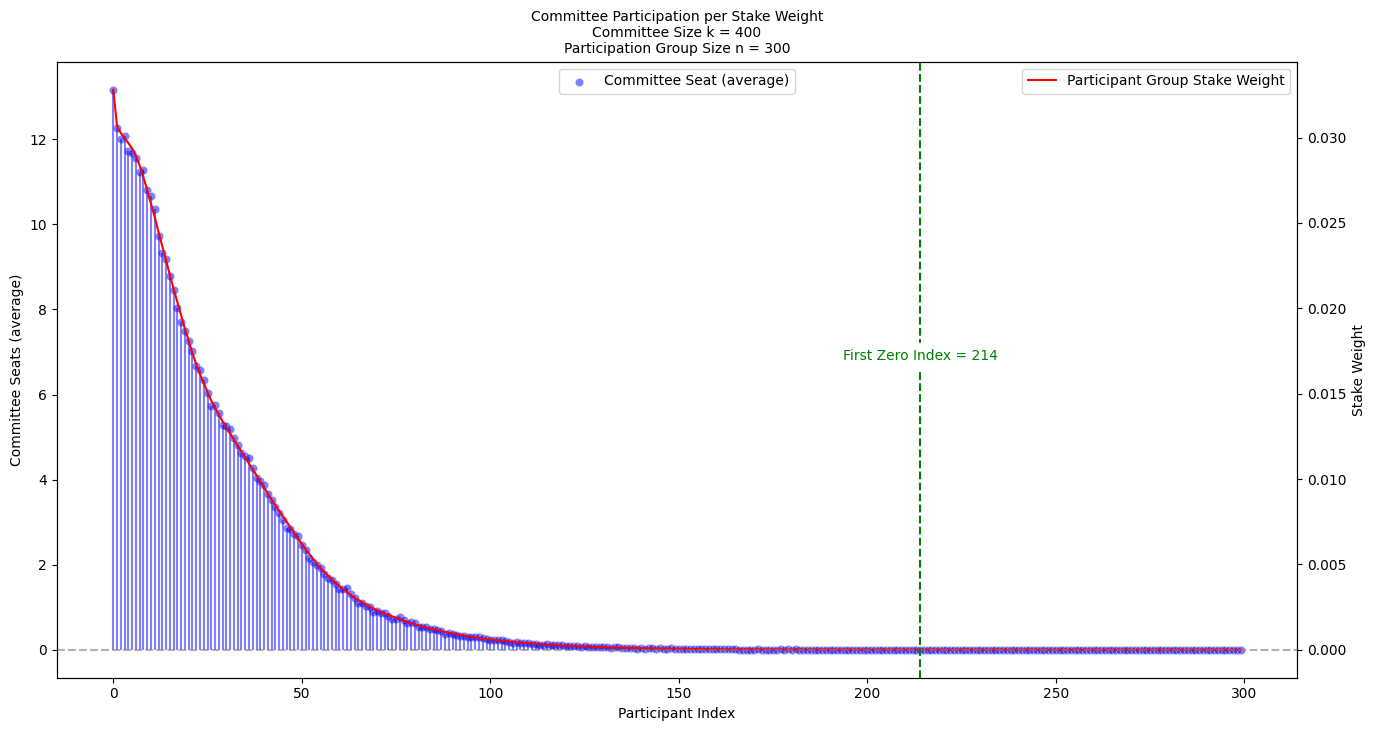

Group Size = 400


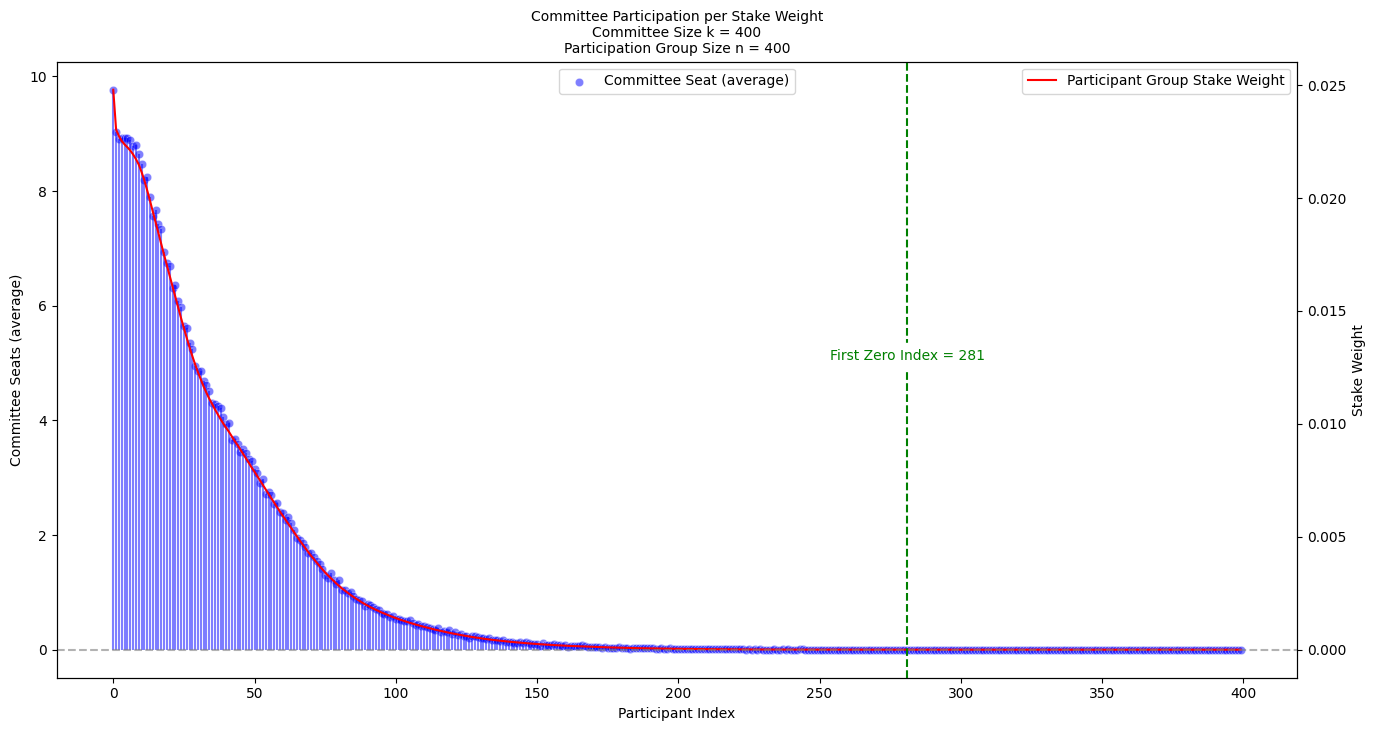

Group Size = 500


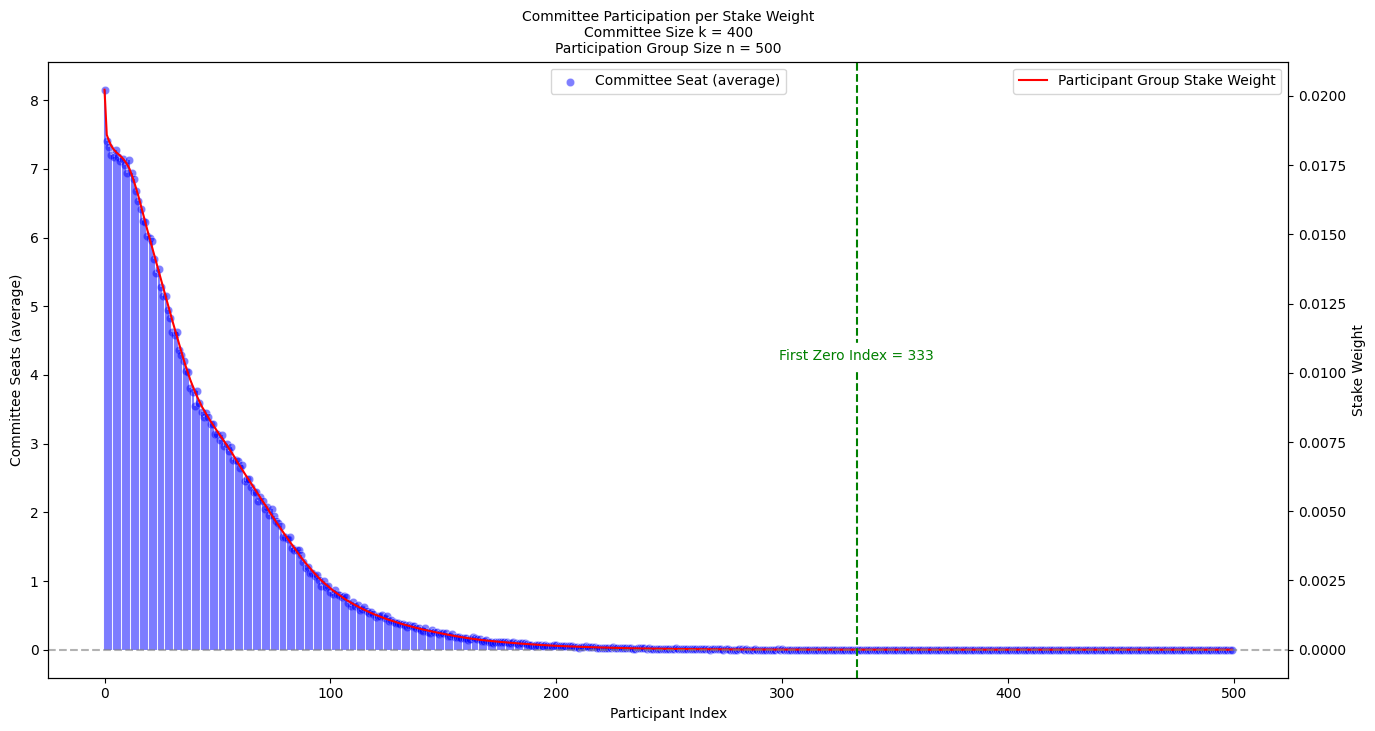


Committee Size = 500
Group Size = 100


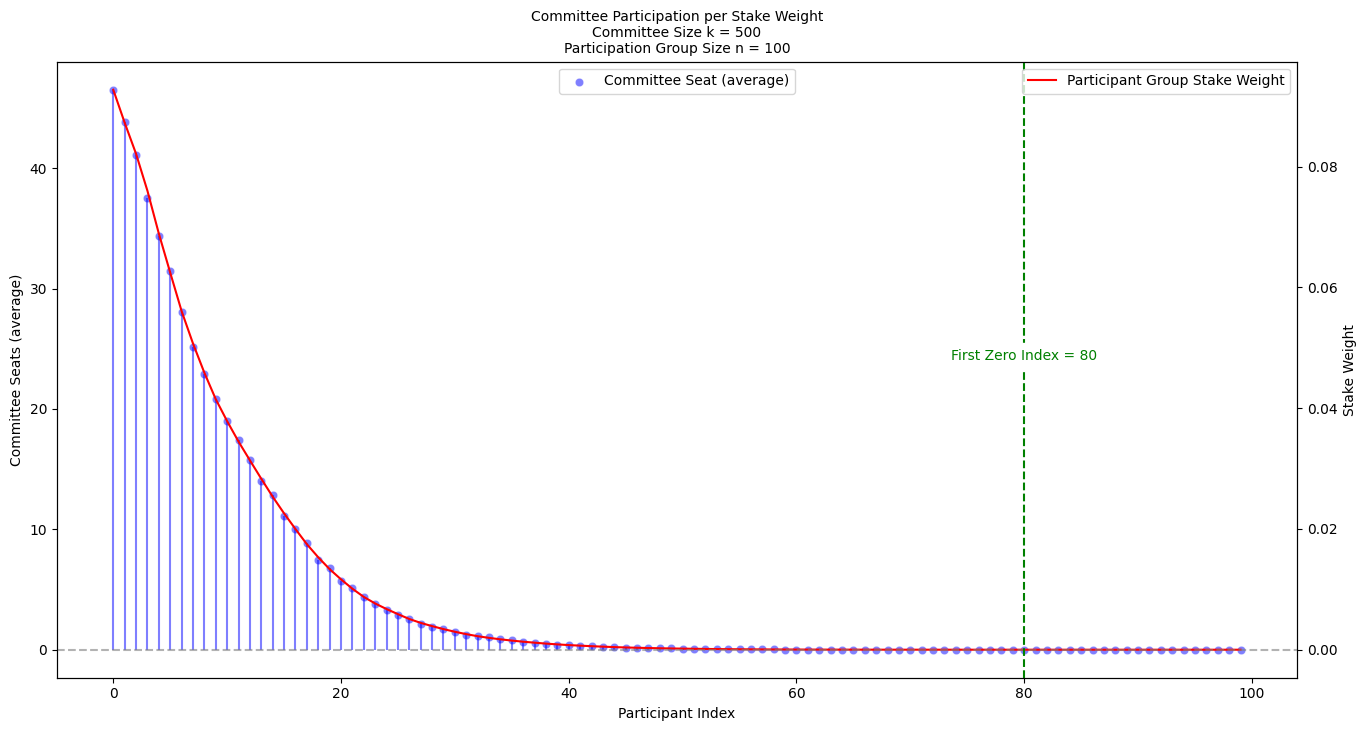

Group Size = 200


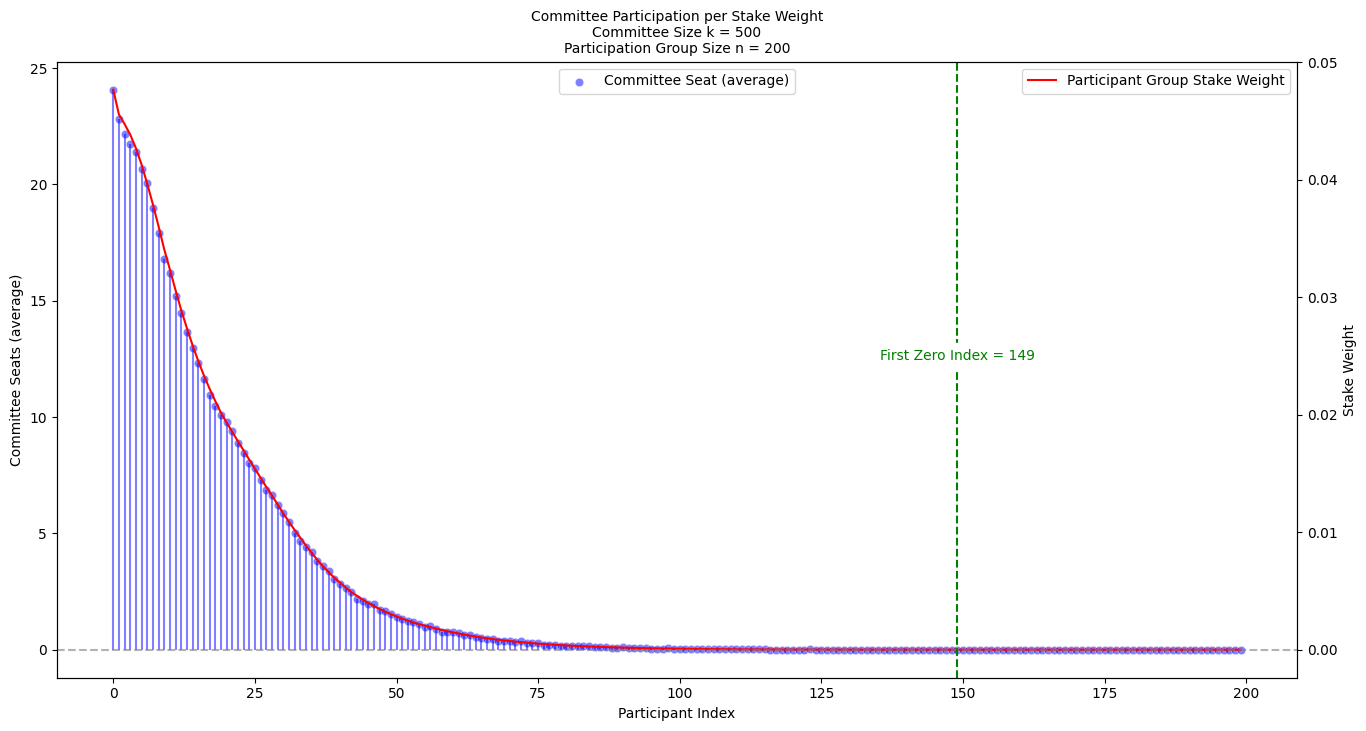

Group Size = 300


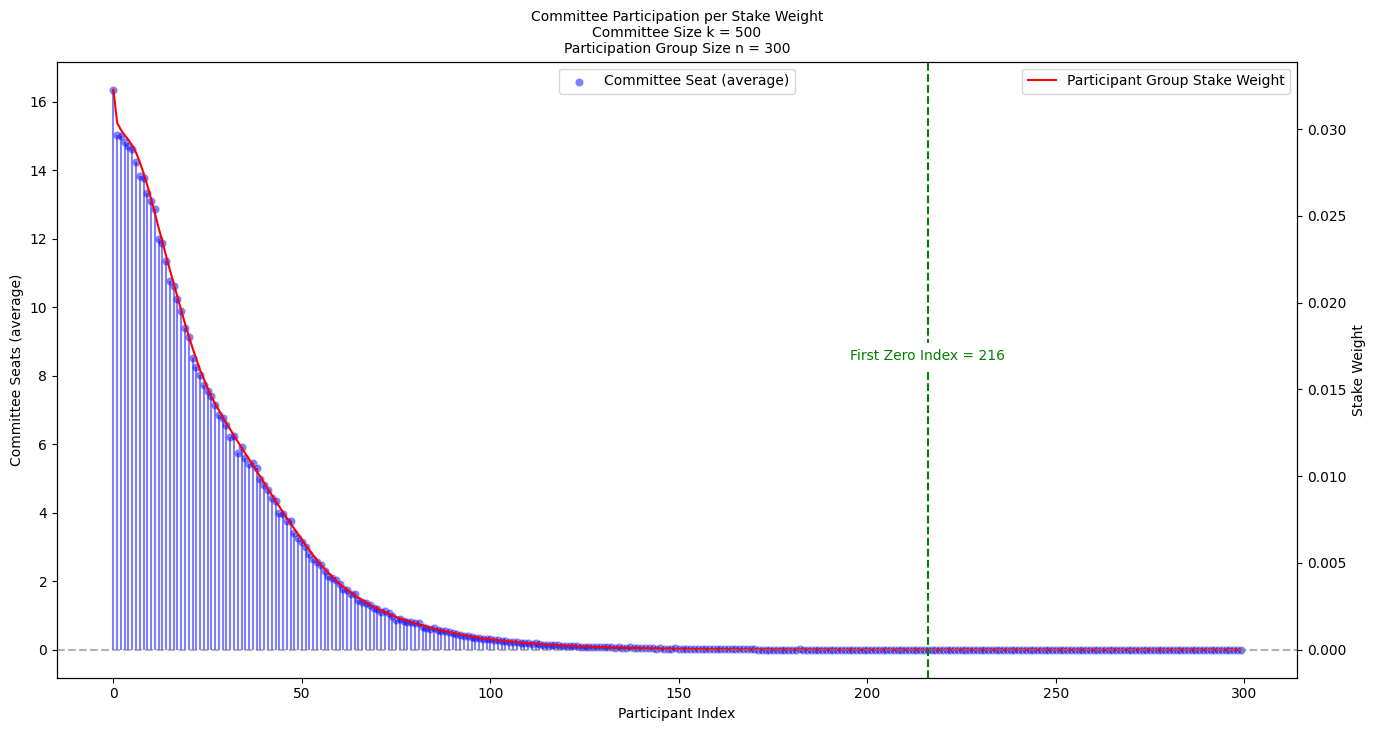

Group Size = 400


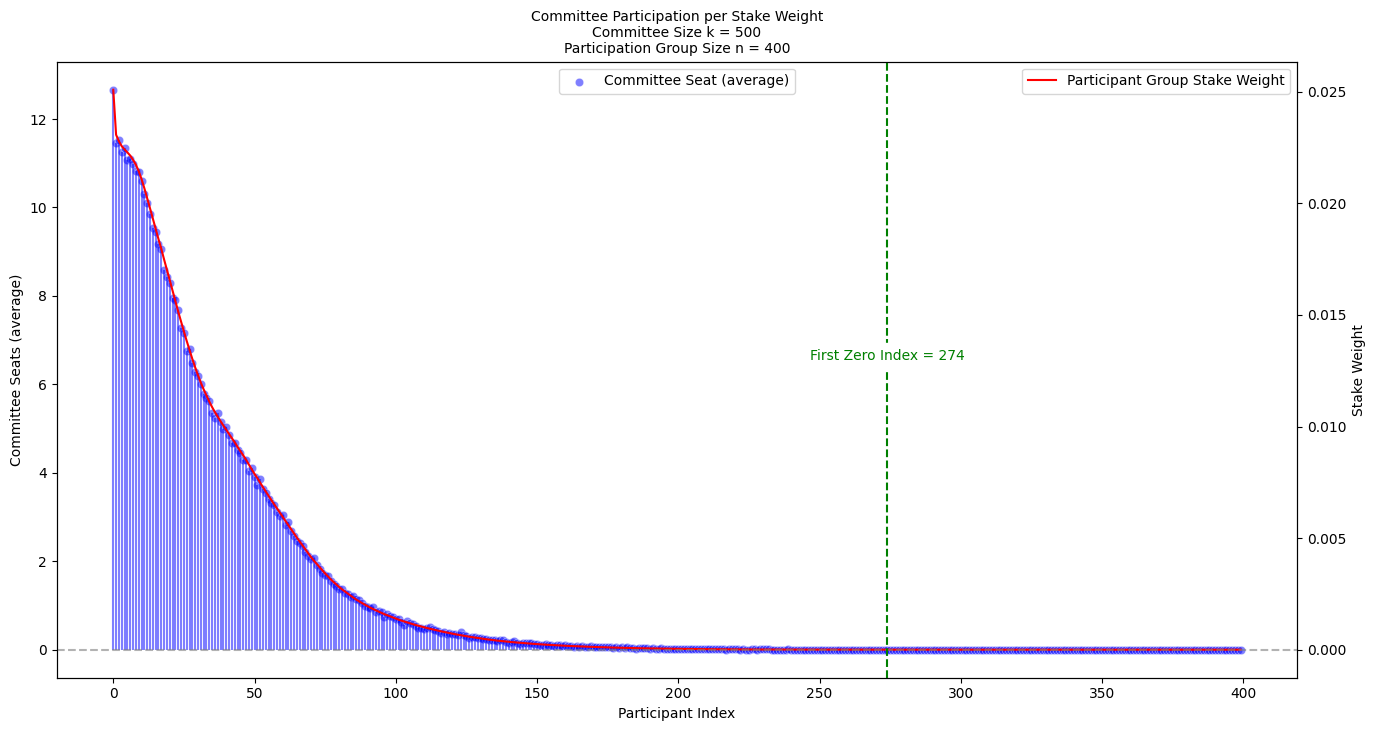

Group Size = 500


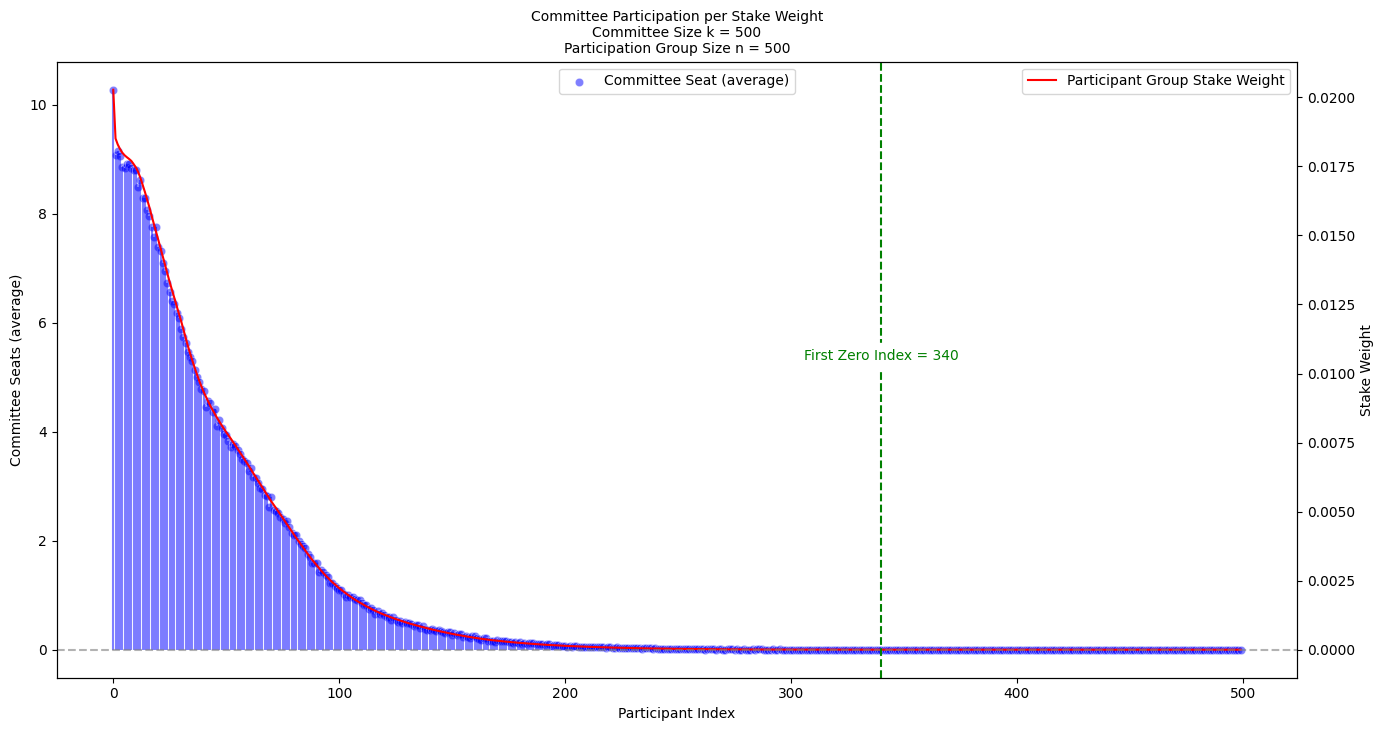

In [ ]:
# %%

# Call the function
sim_results_df = simulate(
    population,
    comm_sizes,
    group_sizes,
    num_iter,
    plot_it=True,
)

In [ ]:
# %%

# committee_seats_df = committee_seats_df.swaplevel(axis=1).sort_index(axis=1)

In [ ]:
# %%

# Extract the data for plotting

col_index = sim_results_df.columns
commitee_sizes = [
    int(col.split("=")[1].strip()) for col in col_index.get_level_values(0).unique()
]
group_sizes = [
    int(col.split("=")[1].strip()) for col in col_index.get_level_values(1).unique()
]

# Examine the data for committee size = 100
committee_size = 100

committee_label = f"Committee Size = {committee_size}"
committee_voters = sim_results_df.loc["Distinct Voters", committee_label]
committee_seats = sim_results_df.loc["Committee Seats", committee_label]

In [ ]:
# %%

# Distinct Voters
print(f"Number of distinct voters for {committee_label}:")
mean_values = committee_voters.loc["mean"]
std_dev_values = committee_voters.loc["sd"]

# Calculate the percentage of participants not selected for committee seats
not_selected_percentages = (1.0 - mean_values / group_sizes) * 100
not_selected_percentages.name = "Excluded (%)"

print(
    pd.concat(
        [mean_values, std_dev_values, not_selected_percentages],
        axis=1,
    )
)

Number of distinct voters for Committee Size = 100:
                    mean        sd Excluded (%)
Group Size                                     
Group Size = 100  25.833  2.108817       74.167
Group Size = 200  40.306  2.874781       79.847
Group Size = 300  49.872  3.236915       83.376
Group Size = 400  57.572  3.513519       85.607
Group Size = 500  63.004  3.586361      87.3992


In [ ]:
# %%

# Create a DataFrame for easier plotting with seaborn
plot_data = pd.DataFrame(
    {
        "Group Size": group_sizes,
        "Percentage Excluded": not_selected_percentages,
        "Std Dev": std_dev_values,
    }
)
print(
    "Percentage of Group Participants Not Selected"
    f" for Committee Seats, k = {committee_size}:"
)

print(plot_data)

Percentage of Group Participants Not Selected for Committee Seats, k = 100:
                  Group Size Percentage Excluded   Std Dev
Group Size                                                
Group Size = 100         100              74.167  2.108817
Group Size = 200         200              79.847  2.874781
Group Size = 300         300              83.376  3.236915
Group Size = 400         400              85.607  3.513519
Group Size = 500         500             87.3992  3.586361


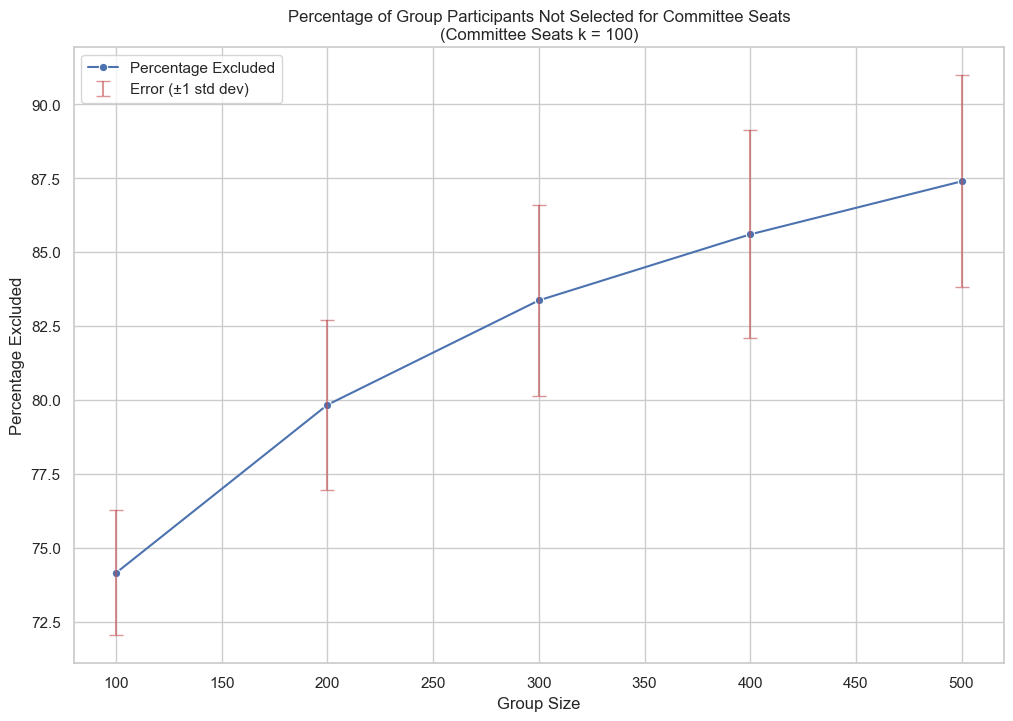

In [ ]:
# %%

# Plot the data with seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the main line without error bars
sns.lineplot(
    x="Group Size",
    y="Percentage Excluded",
    data=plot_data,
    errorbar=std_error,
    err_style="band",
    marker="o",
    color="b",
    label="Percentage Excluded",
)
# Add error bands using plt.errorbar
plt.errorbar(
    plot_data["Group Size"],
    plot_data["Percentage Excluded"],
    yerr=plot_data["Std Dev"],
    fmt="none",  # No connecting line
    ecolor="r",
    capsize=5,
    alpha=0.6,
    label="Error (±1 std dev)"
)
plt.xlabel("Group Size")
plt.ylabel("Percentage Excluded")
plt.title("Percentage of Group Participants Not Selected for Committee Seats"
          f"\n(Committee Seats k = {committee_size})")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# %%

sim_results_df.loc["Distinct Voters", :]

Committee Size Committee Size = 100                                    \
Group Size         Group Size = 100 Group Size = 200 Group Size = 300   
mean                         25.833           40.306           49.872   
sd                         2.108817         2.874781         3.236915   

Committee Size                                   Committee Size = 200  \
Group Size     Group Size = 400 Group Size = 500     Group Size = 100   
mean                     57.572           63.004               31.302   
sd                     3.513519         3.586361              2.21061   

Committee Size                                                     \
Group Size     Group Size = 200 Group Size = 300 Group Size = 400   
mean                     50.782           66.687           79.377   
sd                     2.882443         3.722235         4.152213   

Committee Size                   ... Committee Size = 400                   \
Group Size     Group Size = 500  ...     Group Size = 100 Group Size = 200   
mean                     90.509  ...               36.227           60.693   
sd                     4.402717  ...             2.188943         3.075183   

Committee Size                                                     \
Group Size     Group Size = 300 Group Size = 400 Group Size = 500   
mean                     81.471          100.631          117.117   
sd                     3.596548         4.085932         4.541069   

Committee Size Committee Size = 500                                    \
Group Size         Group Size = 100 Group Size = 200 Group Size = 300   
mean                         37.342           63.868           86.691   
sd                         2.155235         3.127711          3.82564   

Committee Size                                    
Group Size     Group Size = 400 Group Size = 500  
mean                    107.003           125.78  
sd                     4.277264         4.615799  

[2 rows x 25 columns]

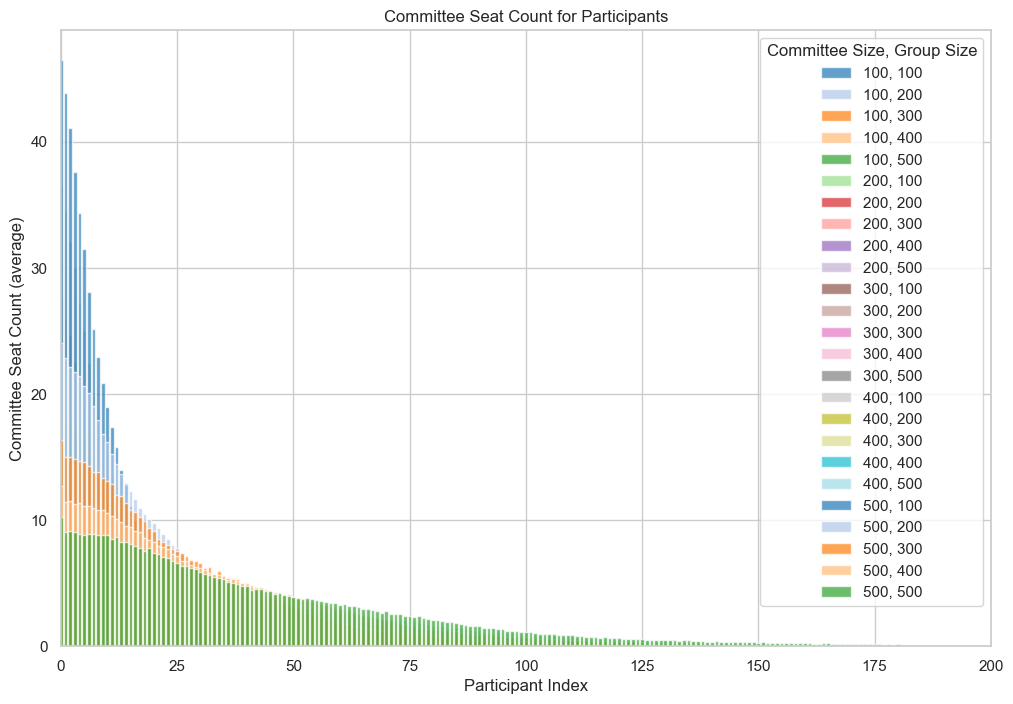

In [ ]:
# %%

# Plot the committee selection counts distribution
fig = plt.figure(figsize=(12, 8))

plot_data = sim_results_df.loc["Committee Seats"].loc["mean"]

for c, g in plot_data.index:

    y = plot_data.loc[(c, g)]
    x = y.index

    n_c = int(c.split("=")[1].strip())
    n_g = int(g.split("=")[1].strip())

    colors = sns.color_palette("tab20", len(plot_data.index))
    color_idx = list(plot_data.index).index((c, g))
    plt.bar(x, y, alpha=0.7, color=colors[color_idx], label=f"{n_c}, {n_g}")

plt.xlabel("Participant Index")
plt.ylabel("Committee Seat Count (average)")
plt.title("Committee Seat Count for Participants")
plt.legend(title="Committee Size, Group Size")
plt.xlim(0, 200)
plt.show()

In [ ]:
# %%

# Distinct Voters
committee_voters = sim_results_df.loc["Distinct Voters"]

# Create a DataFrame row from the computed percentages
mean_values = committee_voters.loc["mean"]
std_dev_values = committee_voters.loc["sd"]

# Calculate the percentage of participants not selected for committee seats
print("Percentage of Group Participants Not Selected for Committee Seats:")
committee_participation = pd.concat([mean_values, std_dev_values], axis=1)
# committee_participation.columns = ["Mean", "Std Dev"]

print(committee_participation)

Percentage of Group Participants Not Selected for Committee Seats:
                                          mean        sd
Committee Size       Group Size                         
Committee Size = 100 Group Size = 100   25.833  2.108817
                     Group Size = 200   40.306  2.874781
                     Group Size = 300   49.872  3.236915
                     Group Size = 400   57.572  3.513519
                     Group Size = 500   63.004  3.586361
Committee Size = 200 Group Size = 100   31.302   2.21061
                     Group Size = 200   50.782  2.882443
                     Group Size = 300   66.687  3.722235
                     Group Size = 400   79.377  4.152213
                     Group Size = 500   90.509  4.402717
Committee Size = 300 Group Size = 100   34.074  2.124741
                     Group Size = 200   56.585  3.050701
                     Group Size = 300   75.777  3.802272
                     Group Size = 400   92.031  4.159332
                     

In [ ]:
# %%

# Prepare the DataFrame for concatenation with the other simulation results
committee_participation = committee_participation.T
committee_participation.index = pd.MultiIndex.from_tuples(
    [("Committee Participation %", "mean"), ("Committee Participation %", "sd")]
)

# Concatenate this new row to the simulation results DataFrame
sim_results_df = pd.concat([sim_results_df, committee_participation], axis=0)

sim_results_df

Committee Size                                               Committee Size = 100  \
Group Size                                                       Group Size = 100   
Distinct Voters           mean                                             25.833   
                          sd                                             2.108817   
Committee Seats           mean  0     9.357
1     8.754
2     8.279
3     7.65...   
Committee Participation % mean                                             25.833   
                          sd                                             2.108817   

Committee Size                                                                     \
Group Size                                                       Group Size = 200   
Distinct Voters           mean                                             40.306   
                          sd                                             2.874781   
Committee Seats           mean  0      4.668
1      4.540
2      4.345
3      ...   
Committee Participation % mean                                             40.306   
                          sd                                             2.874781   

Committee Size                                                                     \
Group Size                                                       Group Size = 300   
Distinct Voters           mean                                             49.872   
                          sd                                             3.236915   
Committee Seats           mean  0      3.199
1      3.075
2      3.020
3      ...   
Committee Participation % mean                                             49.872   
                          sd                                             3.236915   

Committee Size                                                                     \
Group Size                                                       Group Size = 400   
Distinct Voters           mean                                             57.572   
                          sd                                             3.513519   
Committee Seats           mean  0      2.464
1      2.318
2      2.328
3      ...   
Committee Participation % mean                                             57.572   
                          sd                                             3.513519   

Committee Size                                                                     \
Group Size                                                       Group Size = 500   
Distinct Voters           mean                                             63.004   
                          sd                                             3.586361   
Committee Seats           mean  0      1.943
1      1.831
2      1.864
3      ...   
Committee Participation % mean                                             63.004   
                          sd                                             3.586361   

Committee Size                                               Committee Size = 200  \
Group Size                                                       Group Size = 100   
Distinct Voters           mean                                             31.302   
                          sd                                              2.21061   
Committee Seats           mean  0     18.122
1     17.249
2     16.235
3     1...   
Committee Participation % mean                                             31.302   
                          sd                                              2.21061   

Committee Size                                                                     \
Group Size                                                       Group Size = 200   
Distinct Voters           mean                                             50.782   
                          sd                                             2.882443   
Committee Seats           mean  0      9.447
1      9.100
2      8.849
3      ...   

In [ ]:
# %%

# Save the results to an Excel file
output_file = "../data/participation_run_results.xlsx"
sim_results_df.to_excel(output_file)
print(f"Results saved to {output_file}")

Results saved to ../data/participation_run_results.xlsx
